In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
https://www.kaggle.com/srolka/ecommerce-customers/data#
    We will be using Linear Regression to advise a (fake) Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

We'll first explore this data, before using Linear Regression to study the correlations between the different factors and how they affect the how much the customer spends.
https://www.kaggle.com/bdmj12/linear-regression-portfolio-project/comments

In [12]:

df=pd.read_csv(r"C:\Users\Tuan Nguyen\Ecommerce Customers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [14]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


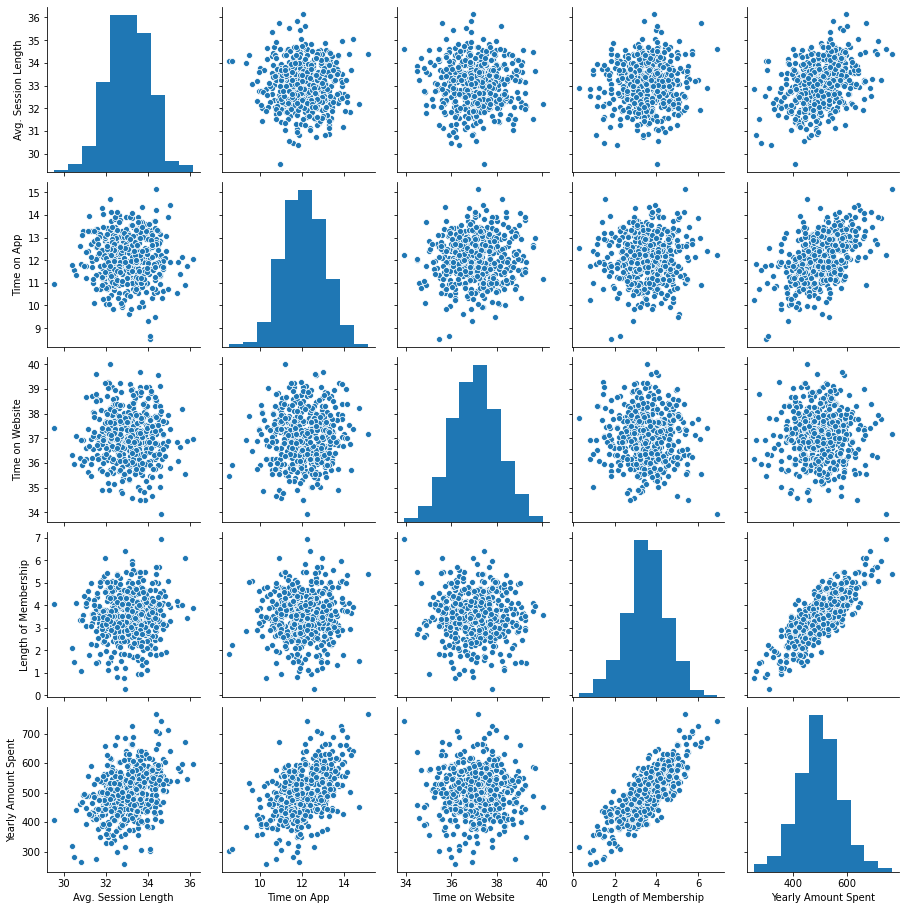

In [16]:
sns.pairplot(df)

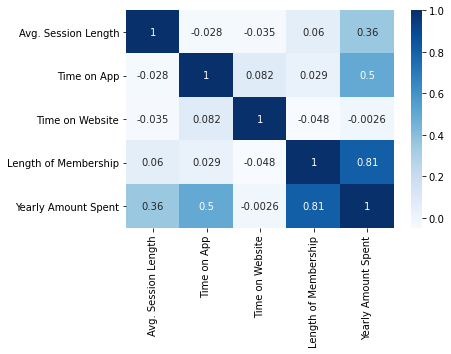

In [21]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [23]:
As we can see, there is a strong correlation between Length of membership and yearly amount spend.

SyntaxError: invalid syntax (<ipython-input-23-14c06b608892>, line 1)

In [ ]:
SPLITTING THE DATA: we will split the data into train and test data set.

In [24]:
x=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=df[['Yearly Amount Spent']]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [28]:
print('Training the model')

Training the model


In [29]:
from sklearn.linear_model import LinearRegression


In [30]:
lm=LinearRegression()

In [31]:
lm.fit(x_train,y_train)

LinearRegression()

In [33]:
lm.coef_

array([[25.98154972, 38.59015875,  0.19040528, 61.27909654]])

In [34]:
lm.intercept_

array([-1047.93278225])

In [35]:
print('2/ Predicting the model')

2/ Predicting the model


In [37]:
yhat=lm.predict(x_test)

In [38]:
print('predict value',yhat[0:4])
print('actual value',y_test[0:4].values)

predict value [[456.44186104]
 [402.72005312]
 [409.2531539 ]
 [591.4310343 ]]
actual value [[452.31567548]
 [401.03313522]
 [410.06961106]
 [599.40609205]]


Text(0.5, 1.0, 'Scatter plot to compare between actual and predict value')

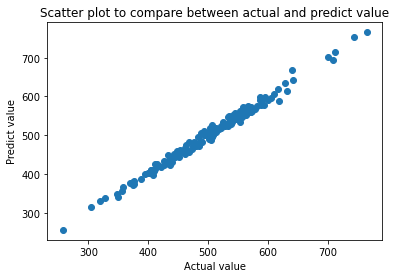

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test,yhat)
plt.xlabel('Actual value')
plt.ylabel('Predict value')
plt.title('Scatter plot to compare between actual and predict value')

In [49]:
print('3/Evaluating the model')
print('By calculating some errors')

3/Evaluating the model
By calculating some errors


In [50]:
from sklearn import metrics

In [53]:
mean_absolute_errors=metrics.mean_absolute_error(y_test,yhat)
mean_squared_errors=metrics.mean_squared_error(y_test,yhat)
root_meansqu=np.sqrt(metrics.mean_squared_error(y_test,yhat))

In [55]:
print('mean_absolute_errors',mean_absolute_errors)
print('mean_squared_errors',mean_squared_errors)
print('root_meansqu',root_meansqu)

mean_absolute_errors 7.228148653430838
mean_squared_errors 79.81305165097461
root_meansqu 8.933815066978642


In [ ]:
4/ Conclusions:

In [67]:
coef=lm.coef_
print(coef)

[[25.98154972 38.59015875  0.19040528 61.27909654]]


In [79]:
c=pd.DataFrame([[coef]],x.columns)
c.columns=['Coefficient']
c

,Coefficient
Avg. Session Length,"[[25.98154972349578, 38.590158753114075, 0.190..."
Time on App,"[[25.98154972349578, 38.590158753114075, 0.190..."
Time on Website,"[[25.98154972349578, 38.590158753114075, 0.190..."
Length of Membership,"[[25.98154972349578, 38.590158753114075, 0.190..."


In [ ]:
Base on the chart above, we can see that customer spend most of their time on App, which could make more money for company. 
Decision: the company should focus on App to make more profit rather than focus on website, which shows the lowest performance.